# Data Collection from Real Users for LLM Training

## Introduction

Large Language Models (LLMs) are only as good as the data they are trained on. While vast amounts of publicly available text (books, articles, code repositories) form the backbone of their knowledge, real-user interactions provide something even more valuable: dynamic, contextual, and human-like responses that reflect how people actually communicate.

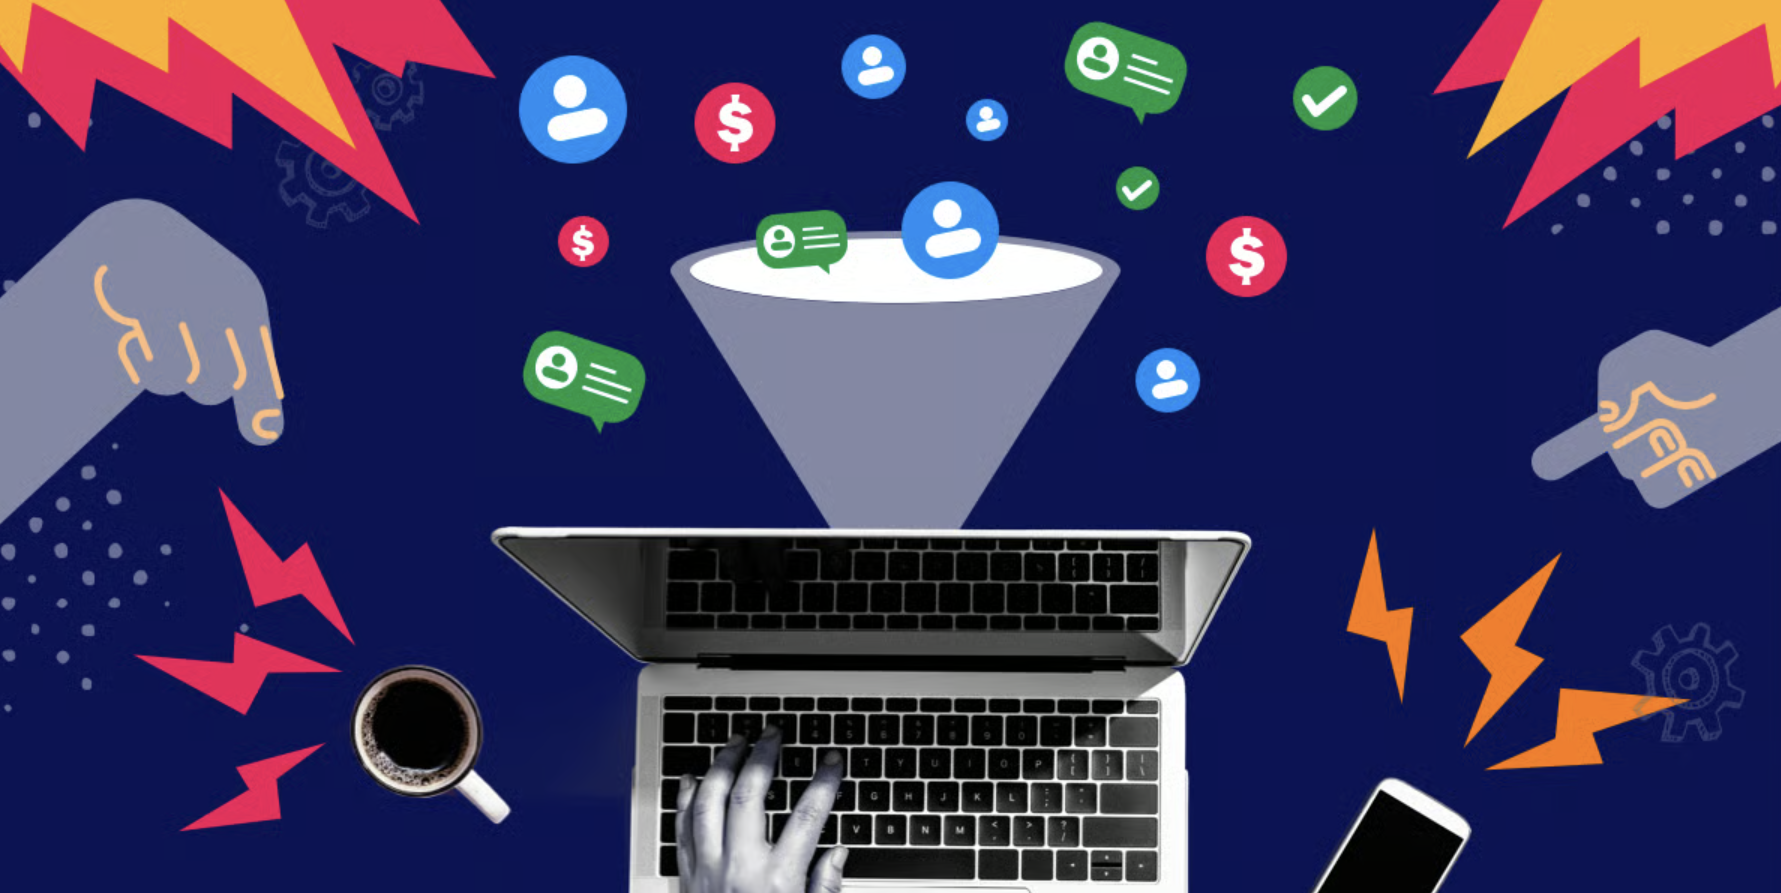

However, collecting and using real-user data is fraught with challenges. Privacy concerns, ethical dilemmas, and legal restrictions complicate the process. How do companies gather this data responsibly? What methods ensure fairness and accuracy while minimizing harm? And how do users themselves feel about their words being used to train AI systems?

This notebook explores the complexities of real user data collection, its sources, methods, preprocessing steps, and ethical considerations, all while examining real cases where this practice has succeeded or sparked controversy.

## Sources of Real-User Data for LLM Training
The foundation of any large language model lies in the data it consumes. While early AI systems relied primarily on carefully curated datasets from books and academic papers, modern LLMs demand a richer diet of real world language, the kind that flows naturally in human conversations, customer service chats, and online forums.

### The Landscape of User-Generated Data
When we examine where LLMs acquire their knowledge of human language, we find three broad categories of sources:

- **Direct contributions**: where users knowingly provide training data

- **Passive interactions**: where data is collected from normal platform usage

- **Curated external datasets**: that incorporate user-generated content

Each of these pathways offers distinct advantages and raises unique concerns that developers must carefully consider. The choice of data sources significantly impacts not only the model's performance but also its potential biases and the ethical implications of its use.

### Direct User Contributions
Many organizations have implemented systems for collecting explicit training data from willing participants. Wikipedia stands as perhaps the most successful example of this approach, with its millions of volunteer editors creating what has become one of the most important textual resources for AI training. The encyclopedia's open editing model produces remarkably high-quality content that has proven invaluable for teaching language models about factual information across countless domains.

#### Rating Systems

Beyond public collaborative projects, tech companies have developed more structured approaches to gathering direct input. Some AI assistants now incorporate feedback mechanisms where users can rate responses or suggest improvements. These systems often employ a simple thumbs-up/thumbs-down interface, though more sophisticated platforms allow for detailed corrections and rewrites. Google's AI Principles team reported in 2022 that such direct feedback mechanisms improved their model's accuracy by nearly 18% in customer facing applications.

Here is a quick simple example of how this can be done:

In [5]:
import requests
import json

# Define the API info
url = "https://api.ubiai.tools:8443/api_v1/annotate"
my_token = "/3815e086-2bd8-11f0-a09d-0242ac110002"

# Step 1: Send user input to the AI
data = {
    "input_text": "What is the capital of France?",
    "system_prompt": "You are a helpful assistant.",
    "user_prompt": "",
    "temperature": 0.7,
    "monitor_model": True,
    "knowledge_base_ids": [],
    "session_id": "12345"
}

In [6]:
response = requests.post(url + my_token, json=data)
res = json.loads(response.content.decode("utf-8"))
ai_output = res.get('output', 'No response from AI.')

print("🤖 AI says:", ai_output)

# Step 2: Get feedback from the user
print("\n📝 Please rate the response:")
rating = input("Was this helpful? (👍 = 1 / 👎 = 0): ").strip()
comment = input("Optional feedback (What could be improved?): ").strip()

# Step 3: Store or send feedback
feedback_data = {
    "session_id": data["session_id"],
    "input_text": data["input_text"],
    "ai_output": ai_output,
    "rating": int(rating),
    "comment": comment
}



🤖 AI says:  The capital of France is Paris.

📝 Please rate the response:
Was this helpful? (👍 = 1 / 👎 = 0): 1
Optional feedback (What could be improved?): Could be more detailed. 


In [8]:
# print/stash locally
print("\n✅ Feedback recorded:")
print(json.dumps(feedback_data, indent=2))


✅ Feedback recorded:
{
  "session_id": "12345",
  "input_text": "What is the capital of France?",
  "ai_output": " The capital of France is Paris.",
  "rating": 1,
  "comment": "Could be more detailed."
}


#### Crowdsourcing for LLM Training

Crowdsourcing platforms represent another crucial channel for obtaining human-generated training data. Services like **Amazon Mechanical Turk** and specialized AI training firms enable companies to distribute microtasks to thousands of workers worldwide. These tasks might involve:

- Ranking potential responses by quality  
- Identifying toxic or biased content  
- Generating example dialogues  
- Paraphrasing sentences for diversity  

#### Common Crowdsourcing Tasks for LLM Training

| **Task Type**          | **Purpose**                               | **Average Completion Time** | **Typical Pay Rate**           |
|------------------------|-------------------------------------------|-----------------------------|--------------------------------|
| Response Ranking       | Improve output quality through RLHF       | 30–45 sec/item              | $0.10–$0.20 per task           |
| Toxicity Labeling      | Identify harmful content                  | 15–30 sec/item              | $0.05–$0.15 per task           |
| Dialogue Generation    | Create training conversations             | 2–5 min/dialogue            | $0.50–$1.00 per task           |
| Text Paraphrasing      | Increase linguistic diversity             | 1–2 min/phrase              | $0.20–$0.40 per task           |


However, these practices have drawn criticism regarding labor conditions. A **2023 study by the AI Ethics Institute** found that many data labelers earn **below living wages**, with some workers reporting compensation as low as **$1.50 per hour** for annotation tasks.


### Passive Data Collection from User Interactions
While direct contributions provide high quality signals, they represent only a fraction of the data used in modern LLM training. Most real user data comes from passive collection: the recording and analysis of normal interactions with digital platforms.

Customer service chatbots represent one of the richest sources of such data. Companies like Zendesk and Intercom process millions of support conversations annually, creating vast repositories of problem-solving dialogues. When properly anonymized, these exchanges provide invaluable training material for AI systems learning to handle customer inquiries.

In [ ]:
import requests
import json
import pandas as pd

# Initialize an empty list to store chat records
chat_log = []

# Optional session ID for tracking
session_id = "support_chat_001"

In [9]:
# Start chat loop
print("🤖 Chatbot: Hello! How can I help you today? (type 'exit' to end)\n")
while True:
    user_input = input("🧑 You: ")
    if user_input.lower() in ["exit", "quit"]:
        break

    # Prepare API request
    data = {
        "input_text": user_input,
        "system_prompt": "You are a helpful assistant.",
        "user_prompt": "",
        "temperature": 0.7,
        "monitor_model": True,
        "knowledge_base_ids": [],
        "session_id": session_id
    }

    # Send request to the chatbot
    try:
        response = requests.post(url + my_token, json=data)
        res = json.loads(response.content.decode("utf-8"))
        ai_response = res.get("output", "[No response]")
    except Exception as e:
        ai_response = f"[Error: {e}]"

    print(f"🤖 Chatbot: {ai_response}\n")

    # Log the conversation
    chat_log.append({
        "user_input": user_input,
        "chatbot_response": ai_response
    })



🤖 Chatbot: Hello! How can I help you today? (type 'exit' to end)

🧑 You: Hello I want you to tell me what machine learning is.
🤖 Chatbot:  Machine learning is a subset of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. It focuses on the development of computer programs that can access data and use it to learn for themselves.

The process of learning begins with observations or data, such as examples, direct experience, or instruction, in order to look for patterns in data and make better decisions in the future based on the examples that we provide. The primary aim is to allow the computers to learn automatically without human intervention or assistance and adjust actions accordingly.

There are three main types of machine learning: supervised learning, unsupervised learning, and reinforcement learning. Each type has its own approach to learning from data.

1. Supervised learning is t

In [10]:
# Convert to DataFrame
df = pd.DataFrame(chat_log)
print("\n📄 Chat session summary:")
df

,user_input,chatbot_response
0,Hello I want you to tell me what machine learn...,Machine learning is a subset of artificial in...
1,can you explain supervised learning in a phrase?,Learning from labeled data to make prediction...


### Third-Party Data and Licensed Corpora
Not all user-generated data comes directly from a company's own platforms. Many organizations supplement their training corpora with licensed datasets containing real-user content. Common sources include:

- Academic archives of forum discussions

- Licensed news comment sections

- Anonymized government correspondence

- Purchased chat logs from messaging platforms

The New York Times reported in 2023 that several major AI companies had entered multi-million dollar licensing agreements with media organizations for access to curated comment sections and reader submissions.

## Data Preprocessing and Quality Control for LLM Training

The journey from raw user-generated data to refined training material represents one of the most critical yet underappreciated phases in developing large language models. Unlike carefully edited textbooks or professionally written articles, real user data arrives messy, inconsistent, and often problematic. A 2023 study by the AI Research Institute found that unprocessed collected datasets typically contain between 12-18% unusable or harmful content before cleaning. This section explores the sophisticated preprocessing pipelines that transform this raw material into high quality training data.

#### The Preprocessing Pipeline

Modern LLM training pipelines employ a multi-stage filtration and enhancement process that typically follows these stages:

| **Processing Stage**       | **Primary Purpose**            | **Common Techniques**                         | **Time Investment**     |
|----------------------------|-------------------------------|------------------------------------------------|--------------------------|
| Initial Cleaning           | Remove technical artifacts     | HTML stripping, encoding normalization         | 15-20% of total          |
| Toxicity Filtering         | Eliminate harmful content      | Classifier models, keyword lists               | 20-25% of total          |
| Deduplication              | Prevent dataset skewing        | MinHash, SimHash algorithms                    | 10-15% of total          |
| Privacy Scrubbing          | Remove personal information    | NER models, regex patterns                     | 25-30% of total          |
| Structural Enhancement     | Improve training utility       | Sentence segmentation, metadata addition       | 10-15% of total          |


#### Initial Cleaning and Normalization
The first challenge preprocessing teams face involves handling the technical "noise" present in user data. For example web-scraped text often contains HTML tags, JavaScript code, and broken encoding that must be removed. A 2022 analysis of Common Crawl data revealed that approximately 8% of sampled pages contained significant rendering artifacts that would interfere with language modeling.

Normalization extends beyond technical cleanup to include linguistic standardization. This involves:

- Converting all text to a consistent encoding (typically UTF-8)

- Standardizing whitespace and punctuation

- Handling special characters and emoji

- Normalizing date/time formats

- Converting numbers to consistent representations

The OpenAI technical paper on GPT-4 development noted that their normalization pipeline reduced token count variance by 37% while preserving semantic content, significantly improving training efficiency.


Here is a simple example of what a normalization step can look like:

In [11]:
import re
import unicodedata

# Example of messy web-scraped text
raw_text = """
<html><head><title>Example</title></head><body>
<p>Today’s date is 03-12-2023! 😊 Visit our site at <a href='http://example.com'>here</a>.</p>
<script>alert("hi")</script>
&nbsp;Price: $12.50 USD&nbsp;
</body></html>
"""



In [12]:

def clean_and_normalize(text):
    # 1. Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # 2. Remove JavaScript code (simple case)
    text = re.sub(r'<script.*?>.*?</script>', '', text, flags=re.DOTALL)

    # 3. Replace HTML entities
    text = text.replace("&nbsp;", " ")

    # 4. Normalize Unicode characters (e.g., smart quotes, emojis)
    text = unicodedata.normalize("NFKC", text)

    # 5. Remove emoji and non-text symbols (optional)
    text = re.sub(r'[^\w\s.,!?$-]', '', text)

    # 6. Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # 7. Normalize date format (simple example: DD-MM-YYYY to YYYY-MM-DD)
    text = re.sub(r'(\d{2})-(\d{2})-(\d{4})', r'\3-\2-\1', text)

    return text


In [14]:
clean_text = clean_and_normalize(raw_text)
print("Cleaned and Normalized Text:\n", clean_text)

Cleaned and Normalized Text:
 Example Todays date is 2023-12-03! Visit our site at here. alerthi Price $12.50 USD


#### Toxicity and Bias Mitigation
Perhaps the most sensitive preprocessing task involves identifying and handling problematic content. Modern systems employ a combination of approaches:

Automated Classifiers - Specially trained models flag potentially harmful content across multiple dimensions:

- **Explicit toxicity** (hate speech, threats)

- **Implicit bias** (stereotyping, microaggressions)

- **Dangerous misinformation** (medical falsehoods, conspiracy theories)

- **Sexual content** (varies by intended application)

Human Review Teams: For edge cases and high-stakes applications, human reviewers provide nuanced judgments that automated systems might miss.

In [16]:
from transformers import pipeline

# Load a toxicity classification pipeline (example: `unitary/toxic-bert`)
classifier = pipeline("text-classification", model="unitary/toxic-bert")



Device set to use cpu


In [ ]:
# Sample dataset with mixed content
texts = [
    "I hope you have a great day!",
    "You're an idiot and no one likes you.",
    "Vaccines cause autism — don't trust them.",
    "This is a neutral statement.",
    "All people from X are lazy and stupid.",
]

In [17]:
def flag_toxic_texts(texts, threshold=0.7):
    flagged = []
    for text in texts:
        result = classifier(text)[0]
        label = result['label'].upper()
        score = result['score']
        print(f"📝 Text: {text}")
        print(f" → Label: {label}, Score: {score:.2f}")

        # Flag only if the label is TOXIC and confidence is above threshold
        if label == "TOXIC" and score >= threshold:
            print(" 🚩 Flagged for review\n")
            flagged.append((text, label, score))
        else:
            print(" ✅ Passed\n")
    return flagged


flagged_texts = flag_toxic_texts(texts)


📝 Text: I hope you have a great day!
 → Label: TOXIC, Score: 0.00
 ✅ Passed

📝 Text: You're an idiot and no one likes you.
 → Label: TOXIC, Score: 0.99
 🚩 Flagged for review

📝 Text: Vaccines cause autism — don't trust them.
 → Label: TOXIC, Score: 0.01
 ✅ Passed

📝 Text: This is a neutral statement.
 → Label: TOXIC, Score: 0.00
 ✅ Passed

📝 Text: All people from X are lazy and stupid.
 → Label: TOXIC, Score: 0.97
 🚩 Flagged for review



**Controversial Decisions**: Some preprocessing choices remain hotly debated:

- Whether to remove all instances of biased language or preserve some for bias detection training

- How to handle historical documents containing outdated terminology

- The appropriate threshold for political content removal

#### Privacy Protection Measures

With increasing regulatory scrutiny, privacy protection has become a non negotiable component of data preprocessing. Modern systems implement multiple safeguards:

**Automated Redaction Systems** employ named entity recognition (NER) models to detect and remove:

- Personal names and usernames
- Physical addresses and location data
- Contact information (phone numbers, emails)
- Financial identifiers (credit card numbers, account details)

**Differential Privacy Techniques** add mathematical noise to datasets to prevent tracing information back to individuals while maintaining statistical usefulness.


| Method               | Privacy Protection Level | Data Utility Impact          | Computational Cost |
|----------------------|---------------------------|-------------------------------|---------------------|
| Full Anonymization   | Highest                   | High (30-40% data loss)       | High                |
| Differential Privacy | Medium-High               | Medium (5-15% utility reduction) | Medium              |
| Pseudonymization     | Medium                    | Low (2-5% utility impact)     | Low                 |
| Aggregation Only     | Low                       | Very Low (<1% impact)         | Very Low            |


In [18]:
import spacy
import re

# Load spaCy's pretrained NER model
nlp = spacy.load("en_core_web_sm")

In [19]:


# Example text with personal info
text = """
John Doe lives at 123 Main Street, New York.
His email is johndoe@example.com and his phone number is (555) 123-4567.
"""


In [20]:

# Redact named entities and contact info
def redact_text(text):
    doc = nlp(text)
    redacted = text

    # Redact named entities
    for ent in doc.ents:
        if ent.label_ in ["PERSON", "GPE", "ORG", "LOC"]:
            redacted = redacted.replace(ent.text, "[REDACTED]")

    # Redact emails and phone numbers with regex
    redacted = re.sub(r'\b[\w.-]+?@\w+?\.\w+?\b', '[REDACTED_EMAIL]', redacted)
    redacted = re.sub(r'\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}', '[REDACTED_PHONE]', redacted)

    return redacted



In [21]:
print("🔎 Original Text:\n", text)
print("\n✅ Redacted Text:\n", redact_text(text))


🔎 Original Text:
 
John Doe lives at 123 Main Street, New York. 
His email is johndoe@example.com and his phone number is (555) 123-4567.


✅ Redacted Text:
 
[REDACTED] lives at 123 Main Street, [REDACTED]. 
His email is [REDACTED_EMAIL] and his phone number is [REDACTED_PHONE].



#### Quality Enhancement Techniques
The final preprocessing stage focuses on enhancing the educational value of the remaining data. Key approaches include:

**Deduplication:** Advanced algorithms identify and remove near duplicate content that could skew training.

**Text Enrichment:** Some pipelines add structural metadata like:

- Topic classifications

- Sentiment labels

- Readability scores

- Discourse markers

**Balancing:** Techniques like upsampling underrepresented dialects or downsampling overrepresented sources help create more equitable training distributions.

In [27]:
import pandas as pd
from textblob import TextBlob

# Sample dataset with duplicates
data = {
    "text": [
        "I love this product! It's amazing.",
        "I love this product! It's amazing.",  # Duplicate
        "This is the worst service ever.",
        "it was okay I guess.",           # Not a duplicate
        "This is the worst service ever."      # Duplicate
    ]
}

In [28]:
# Create DataFrame
df = pd.DataFrame(data)

# Optional: Show duplicates before removal
duplicates = df[df.duplicated(subset="text", keep=False)]
print("🔍 Duplicates found:\n", duplicates)

🔍 Duplicates found:
                                  text
0  I love this product! It's amazing.
1  I love this product! It's amazing.
2     This is the worst service ever.
4     This is the worst service ever.


In [29]:
# Remove exact duplicates
df_cleaned = df.drop_duplicates(subset="text", keep="first").reset_index(drop=True)

# Add sentiment analysis using TextBlob
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "positive"
    elif polarity < -0.1:
        return "negative"
    else:
        return "neutral"

df_cleaned["sentiment"] = df_cleaned["text"].apply(get_sentiment)

# Show final dataset
print("\n✅ Cleaned and enriched dataset:\n", df_cleaned)


✅ Cleaned and enriched dataset:
                                  text sentiment
0  I love this product! It's amazing.  positive
1     This is the worst service ever.  negative
2                it was okay I guess.  positive


### Ongoing Challenges and Future Directions
Despite these sophisticated techniques, significant challenges remain:

- **The Quality-Quantity Tradeoff:** Aggressive filtering produces cleaner data but dramatically reduces dataset size. Google's PaLM team reported rejecting 78% of initial web crawl data during preprocessing.

- **Cultural Context Preservation:** Overzealous filtering may strip away culturally important communication patterns. Researchers at Stanford's AI Institute found that some safety filters disproportionately affected African American Vernacular English.

- **Dynamic Language Evolution:** New slang, memes, and terminology constantly emerge, requiring continuous preprocessing updates. The average lifespan of an effective toxicity filter has dropped from 18 months in 2018 to just 6 months in 2023.

## Exercise: Collect, Clean, and Prepare Chat Data for LLM Training
In this exercise, you will simulate the process of collecting real-world conversational data and preparing it for training a language model. You'll build a small chatbot interaction system, log the conversation, and then preprocess the resulting dataset using the techniques we've studied.

### Step 1: Build a Chat Interface
- Create a loop where the user can type input to a chatbot.

- For each interaction, send the message to an assistant model endpoint and receive a response.

- Store each prompt and response in a list or dictionary.

- End the loop when the user types "exit".

#### Goal: Accumulate a small dataset of real conversations.

### Step 2: Preprocess the Chat Data
Once you've collected the data in a DataFrame:

#### a. Redact Private Information
Use regular expressions to detect and replace things like:

- Email addresses

- Phone numbers

- Credit card numbers or long digit sequences

#### b. Toxicity Filtering
- Manually define a list of toxic keywords or expressions.

- Flag user inputs that contain toxic language.

- Remove rows where user input is toxic.